<a href="https://colab.research.google.com/github/alina-bogdanovskaya/ANN-_intro_Nov2022/blob/lesson1/ANN_lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from math import ceil

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
### Шаг 1. Определение функций, которые понадобятся для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
# def from_one_hot(Y):
#     arr = np.zeros((len(Y), 1))

#     for i in range(len(Y)):
#         l = layer2[i]
#         for j in range(len(l)):
#             if(l[j] == 1):
#                 arr[i] = j+1
#     return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

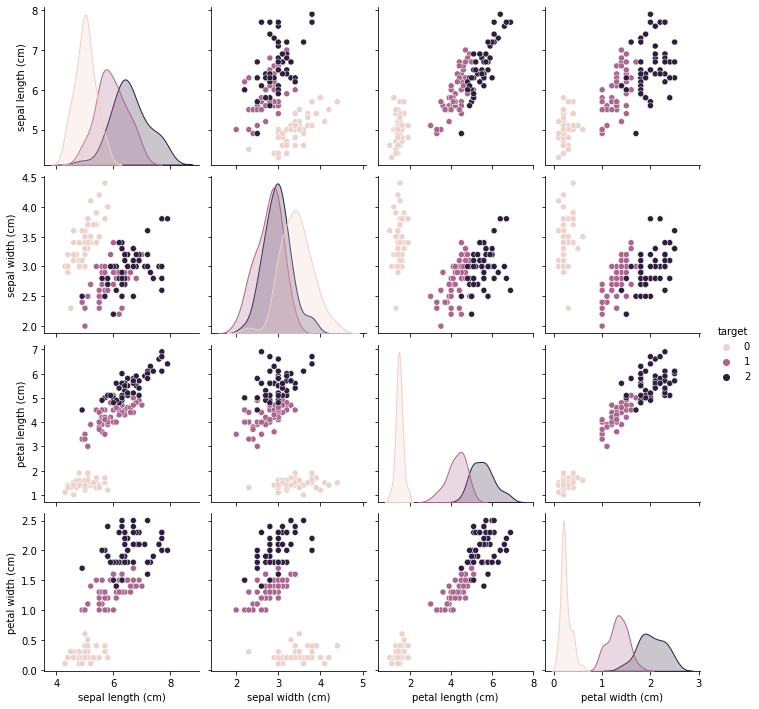

In [9]:
### Шаг 2. Подготовка тренировочных данных
# получения данных
data = load_iris()
iris_data = pd.DataFrame(data=data.data, columns=data.feature_names)
iris_data['target'] = data.target

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data, hue="target")
plt.show()

# формирование входных данных
columns = iris_data.drop('target', axis=1).columns.tolist()
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.to_numpy())

# формирование выходных данных(результатов)
target = ['target']
y = pd.DataFrame(iris_data, columns=target)
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=12)

In [ ]:
iris_data.sample(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
9,4.9,3.1,1.5,0.1,0
90,5.5,2.6,4.4,1.2,1
66,5.6,3.0,4.5,1.5,1
105,7.6,3.0,6.6,2.1,2
125,7.2,3.2,6.0,1.8,2
87,6.3,2.3,4.4,1.3,1
7,5.0,3.4,1.5,0.2,0
53,5.5,2.3,4.0,1.3,1
107,7.3,2.9,6.3,1.8,2
133,6.3,2.8,5.1,1.5,2


In [19]:
### Шаг 3. Обученние нейронной сети в виде функции

def two_layer_net(X_train, X_test, y_train, y_test, neurons, n, alpha, seed):
  # присваивание случайных весов
  np.random.seed(seed)
  w0 = 2*np.random.random((4, neurons)) - 1 # для входного слоя   - 4 входа (= кол-во параметров), кол-во выходов = кол-во нейронов
  w1 = 2*np.random.random((neurons, 3)) - 1 # для внутреннего слоя - кол-во входов = кол-во нейронов, 3 выхода (= кол-во классов)

  # массив для ошибок, чтобы потом построить график
  errors = []
  errors_t = []

  # процесс обучения
  for i in range(n):

      # прямое распространение(feed forward)
      layer0 = X_train
      layer1 = sigmoid(np.dot(layer0, w0))
      layer2 = sigmoid(np.dot(layer1, w1))

      # обратное распространение(back propagation) с использованием градиентного спуска
      layer2_error = y_train - layer2
      layer2_delta = layer2_error * sigmoid_deriv(layer2)
      
      layer1_error = layer2_delta.dot(w1.T)
      layer1_delta = layer1_error * sigmoid_deriv(layer1)
      
      # коррекция
      w1 += layer1.T.dot(layer2_delta) * alpha
      w0 += layer0.T.dot(layer1_delta) * alpha
      
      # метрика модели
      error = np.mean(np.abs(layer2_error))
      errors.append(error)
      accuracy = (1 - error) * 100

      layer0_t = X_test
      layer1_t = sigmoid(layer0_t @ w0)
      layer2_t = sigmoid(layer1_t @ w1)
      layer2_error_t = y_test - layer2_t

      error_t = np.mean(np.abs(layer2_error_t))
      errors_t.append(error_t)
      accuracy_t = (1 - error_t) * 100
  
  return errors, accuracy, errors_t, accuracy_t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


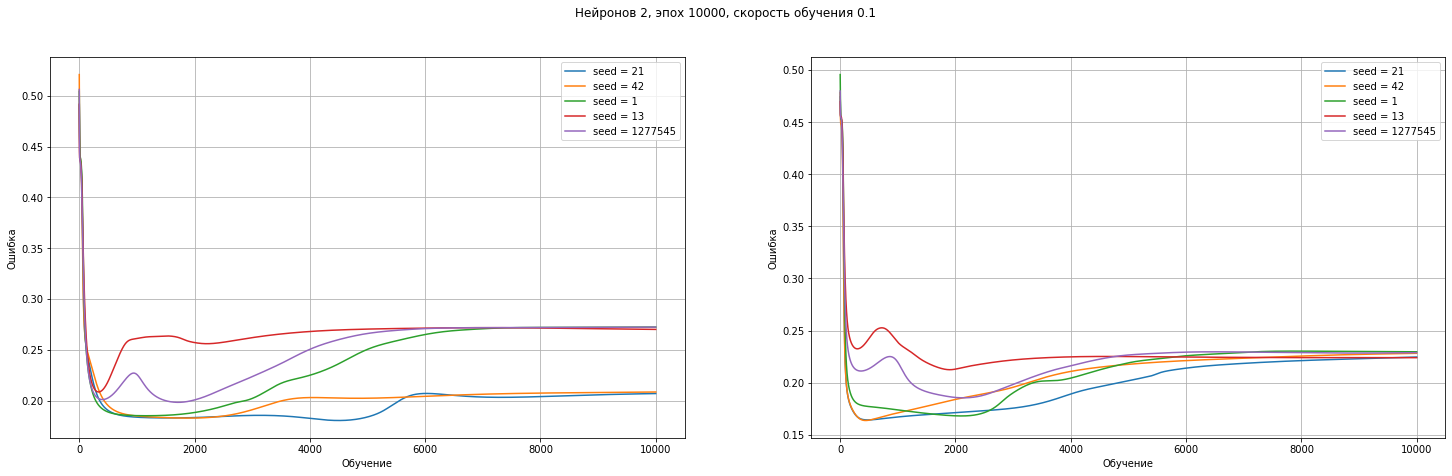

In [47]:
### Влияние начальных весов на график ошибки

neur = 2
iters = 10000
alpha = 0.1
seeds = [21, 42, 1, 13, 1277545]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))
fig.suptitle(f'Нейронов {neur}, эпох {iters}, скорость обучения {alpha}')
ax1.grid()
ax2.grid()

for s in seeds:
  errors, accuracy, errors_t, accuracy_t = two_layer_net(X_train, X_test, y_train, y_test, neurons=neur, n=iters, alpha=alpha, seed=s)
  ax1.plot(errors, label=f'seed = {s}')
  ax1.set_xlabel('Обучение')
  ax1.set_ylabel('Ошибка')
  ax1.legend()
  ax2.plot(errors_t, label=f'seed = {s}')
  ax2.set_xlabel('Обучение')
  ax2.set_ylabel('Ошибка')
  ax2.legend()

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


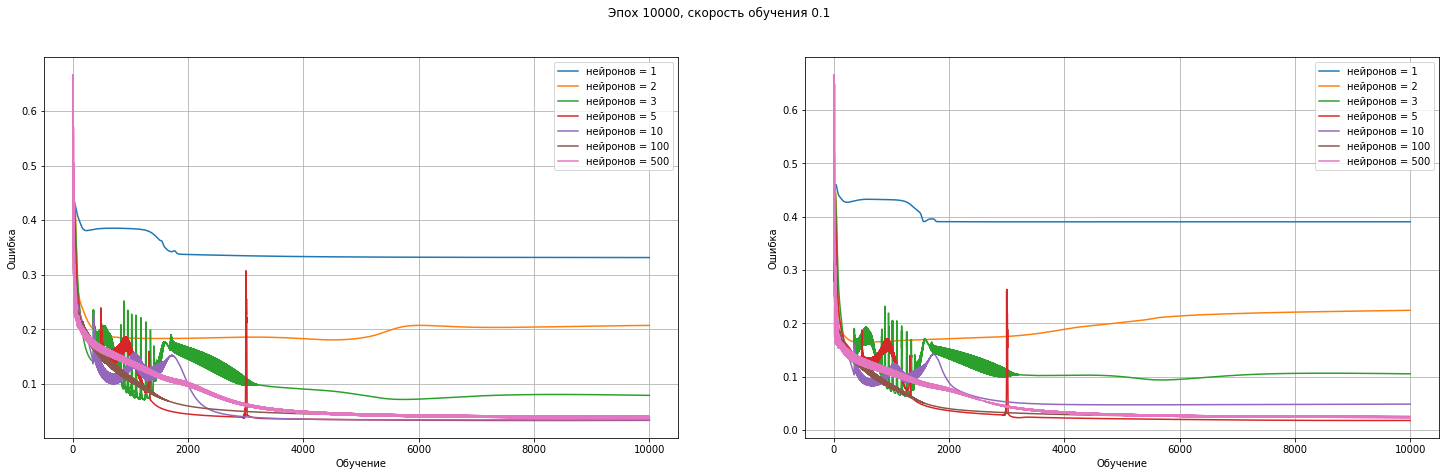

In [52]:
### Влияние количества нейронов на график ошибки

neur_list = [1, 2, 3, 5, 10, 100, 500]
iters = 10000
alpha = 0.1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))
fig.suptitle(f'Эпох {iters}, скорость обучения {alpha}')
ax1.grid()
ax2.grid()

for neur in neur_list:
  errors, accuracy, errors_t, accuracy_t = two_layer_net(X_train, X_test, y_train, y_test, neurons=neur, n=iters, alpha=alpha, seed=21)
  ax1.plot(errors, label=f'нейронов = {neur}')
  ax1.set_xlabel('Обучение')
  ax1.set_ylabel('Ошибка')
  ax1.legend()
  ax2.plot(errors_t, label=f'нейронов = {neur}')
  ax2.set_xlabel('Обучение')
  ax2.set_ylabel('Ошибка')
  ax2.legend()
  
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


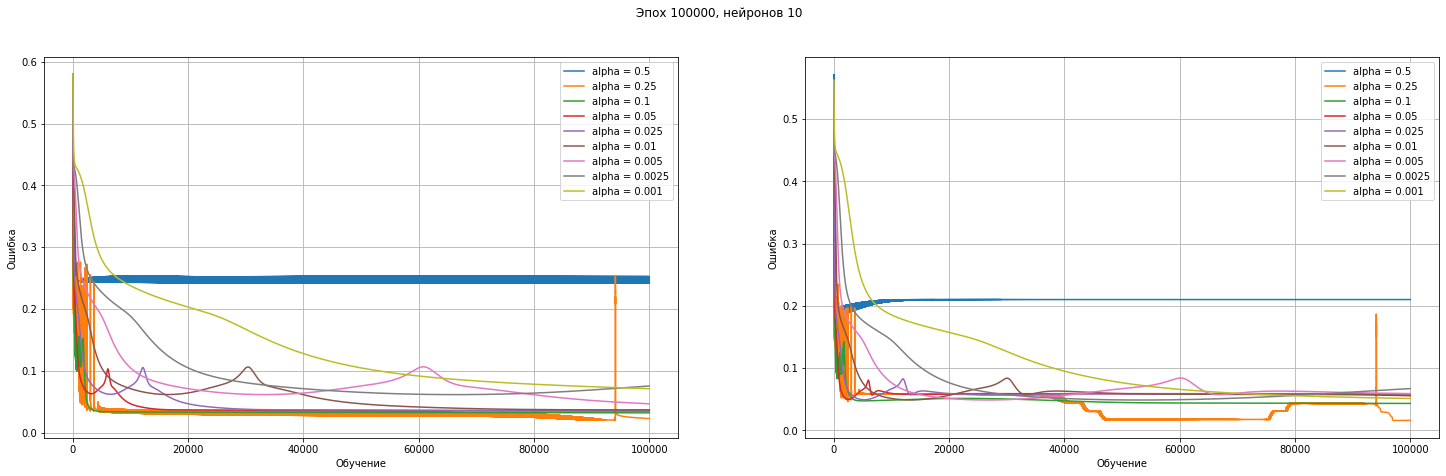

In [62]:
### Влияние скорости обучения на график ошибки

neur = 10
iters = 100000
alphas = [0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.001]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7))
fig.suptitle(f'Эпох {iters}, нейронов {neur}')
ax1.grid()
ax2.grid()

for alpha in alphas:
  errors, accuracy, errors_t, accuracy_t = two_layer_net(X_train, X_test, y_train, y_test, neurons=neur, n=iters, alpha=alpha, seed=21)
  ax1.plot(errors, label=f'alpha = {alpha}')
  ax1.set_xlabel('Обучение')
  ax1.set_ylabel('Ошибка')
  ax1.legend()
  ax2.plot(errors_t, label=f'alpha = {alpha}')
  ax2.set_xlabel('Обучение')
  ax2.set_ylabel('Ошибка')
  ax2.legend()
  
plt.show()

In [66]:
###

neur_list = [1, 2, 3, 5, 10, 100, 500] # число нейронов скрытого слоя
alphas = [0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.001] # скорость обучения (learning rate)
iters = 50000

error_list = []

for neur in neur_list:
  for alpha in alphas:
      errors, accuracy, errors_t, accuracy_t = two_layer_net(X_train, X_test, y_train, y_test, neurons=neur, n=iters, alpha=alpha, seed=21)
      error_list.append((neur, alpha, iters, errors, errors_t, accuracy, accuracy_t))
      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


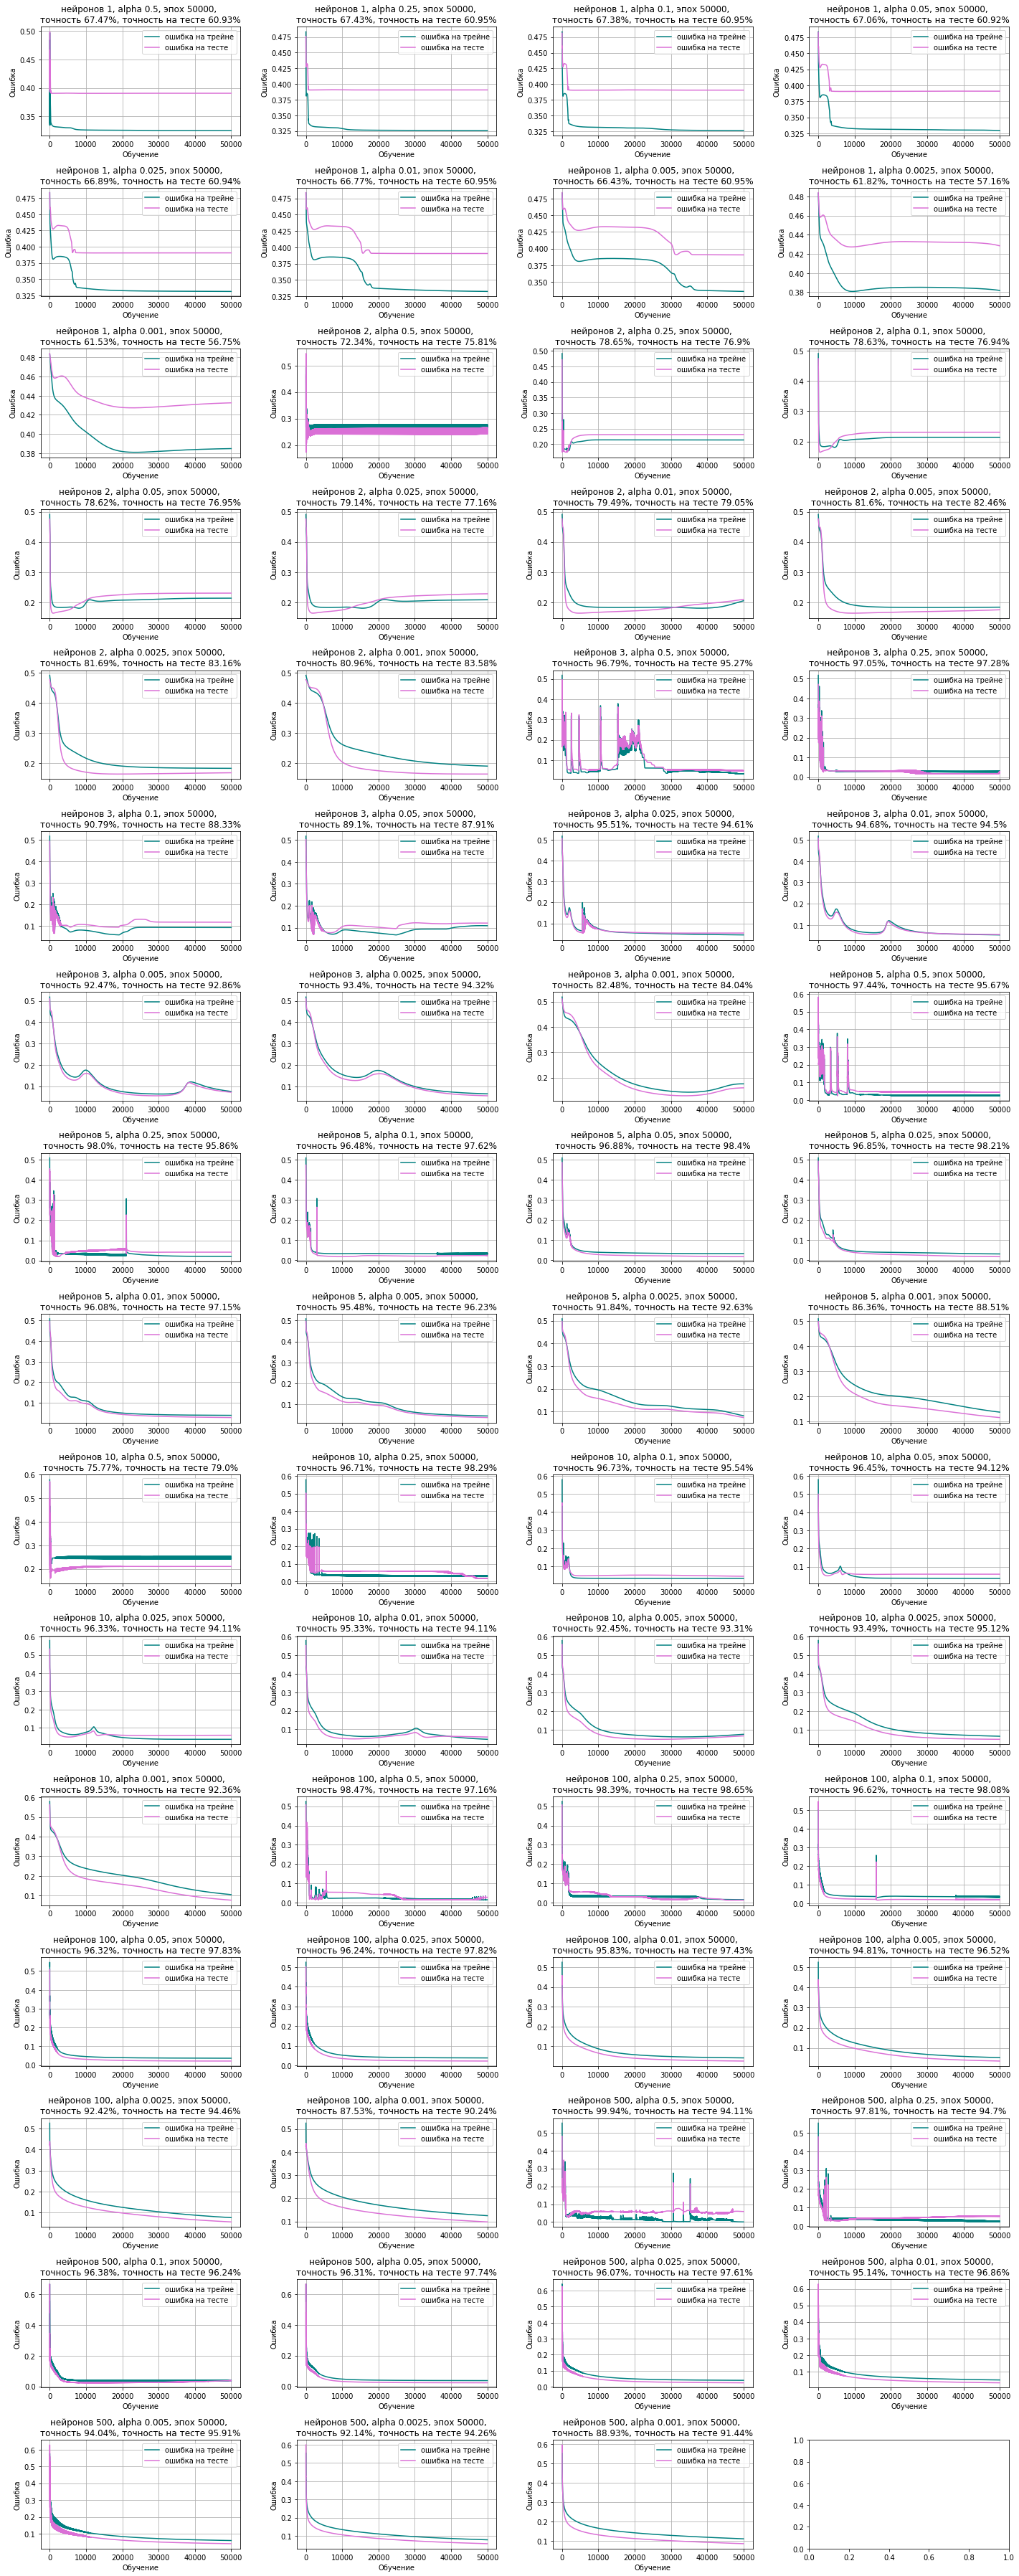

In [67]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения

total_vars = len(neur_list) * len(alphas)
cols = 4
rows = ceil(total_vars / cols)

fig, ax_array = plt.subplots(rows, cols, figsize = (20, 50))
for i, errors in enumerate(error_list):
  row = i // cols
  col = i % cols
  ax_array[row, col].plot(errors[3], color='teal', label = 'ошибка на трейне')
  ax_array[row, col].plot(errors[4], color='orchid', label = 'ошибка на тесте')
  ax_array[row, col].set_title(f'нейронов {errors[0]}, alpha {errors[1]}, эпох {errors[2]}, \nточность {round(errors[5], 2)}%, точность на тесте {round(errors[6],2)}%')
  ax_array[row, col].legend()
  ax_array[row, col].grid()
  ax_array[row, col].set_xlabel('Обучение')
  ax_array[row, col].set_ylabel('Ошибка')

fig.tight_layout()  
plt.show()

In [55]:
### Добавим еще один слой

def three_layer_net(X_train, X_test, y_train, y_test, neurons1, neurons2, n, alpha, seed):

  # присваивание случайных весов
  w0 = 2*np.random.random((4, neurons1)) - 1 # для входного слоя   - 4 входа (= кол-во параметров), кол-во выходов = кол-во нейронов
  w1 = 2*np.random.random((neurons1, neurons2)) - 1 # для внутреннего слоя - кол-во входов = кол-во нейронов, кол-во выходов = кол-во нейронов второго слоя
  w2 = 2*np.random.random((neurons2, 3)) - 1 # для второго внутреннего слоя - кол-во входов = кол-во нейронов первого слоя, 3 выхода (= кол-во классов)

  # массив для ошибок, чтобы потом построить график
  errors = []
  errors_t = []

  # процесс обучения
  for i in range(n):

      # прямое распространение(feed forward)
      layer0 = X_train
      layer1 = sigmoid(np.dot(layer0, w0))
      layer2 = sigmoid(np.dot(layer1, w1))
      layer3 = sigmoid(np.dot(layer2, w2))

      # обратное распространение(back propagation) с использованием градиентного спуска
        
      layer3_error = y_train - layer3
      layer3_delta = layer3_error * sigmoid_deriv(layer3)
      
      layer2_error = layer3_delta.dot(w2.T)
      layer2_delta = layer2_error * sigmoid_deriv(layer2)

      layer1_error = layer2_delta.dot(w1.T)
      layer1_delta = layer1_error * sigmoid_deriv(layer1)
      
      # коррекция
      w2 += layer2.T.dot(layer3_delta) * alpha
      w1 += layer1.T.dot(layer2_delta) * alpha
      w0 += layer0.T.dot(layer1_delta) * alpha
      
      # метрика модели
      error = np.mean(np.abs(layer3_error))
      errors.append(error)
      accuracy = (1 - error) * 100

      layer0_t = X_test
      layer1_t = sigmoid(layer0_t @ w0)
      layer2_t = sigmoid(layer1_t @ w1)
      layer3_t = sigmoid(layer2_t @ w2)
      layer3_error_t = y_test - layer3_t

      error_t = np.mean(np.abs(layer3_error_t))
      errors_t.append(error_t)
      accuracy_t = (1 - error_t) * 100

  return errors, accuracy, errors_t, accuracy_t

In [102]:
neur_list1 = [1, 2, 3, 5, 10, 100] # число нейронов скрытого слоя]
neur_list2 = [1, 2, 3, 5, 10, 100] # число нейронов скрытого слоя
alphas = [0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.001] # скорость обучения (learning rate)
iters = 10000

error_list_3_layers = []

for neur1 in neur_list1:
  for neur2 in neur_list2:
    for alpha in alphas:
      errors, accuracy, errors_t, accuracy_t = three_layer_net(X_train, X_test, y_train, y_test, neurons1=neur1, neurons2=neur2, n=iters, alpha=alpha, seed=21)
      error_list_3_layers.append((neur1, neur2, alpha, iters, errors, errors_t, accuracy, accuracy_t))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


In [107]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения

# total_vars = len(neur_list1) * len(neur_list2) * len(alphas)
# cols = 4
# rows = ceil(total_vars / cols)

# fig, ax_array = plt.subplots(rows, cols, figsize = (20, 250))
# for i, errors in enumerate(error_list_3_layers):
#   row = i // cols
#   col = i % cols
#   ax_array[row, col].plot(errors[4], color='teal', label = 'ошибка на трейне')
#   ax_array[row, col].plot(errors[5], color='orchid', label = 'ошибка на тесте')
#   ax_array[row, col].set_title(f'нейронов на первом слое {errors[0]}, \nнейронов на первом слое {errors[1]}, \nalpha {errors[2]}, эпох {errors[3]}, \nточность {round(errors[6], 2)}%, точность на тесте {round(errors[7],2)}%')
#   ax_array[row, col].legend()
#   ax_array[row, col].grid()
#   ax_array[row, col].set_xlabel('Обучение')
#   ax_array[row, col].set_ylabel('Ошибка')

# fig.tight_layout()  
# plt.show()

In [76]:
pd.set_option('display.max_rows', None)

In [77]:
df_2 = pd.DataFrame(columns=['Число нейронов', 'Скорость обучения', 'Точность на трейне', 'Точность на тесте'])
df_2['Число нейронов'] = [el[0] for el in error_list]
df_2['Скорость обучения'] = [el[1] for el in error_list]
df_2['Точность на трейне'] = [el[5] for el in error_list]
df_2['Точность на тесте'] = [el[6] for el in error_list]
df_2

,Число нейронов,Скорость обучения,Точность на трейне,Точность на тесте
0,1,0.5000,67.466667,60.933333
1,1,0.2500,67.433743,60.946462
2,1,0.1000,67.382420,60.950852
3,1,0.0500,67.057466,60.921892
4,1,0.0250,66.885470,60.942989
5,1,0.0100,66.767104,60.951477
6,1,0.0050,66.431450,60.949055
7,1,0.0025,61.815972,57.157668
8,1,0.0010,61.532134,56.750650
9,2,0.5000,72.341148,75.808453


In [94]:
df_by_alpha = df_2.groupby(['Скорость обучения', 'Число нейронов']).max()
df_by_alpha

Точность на трейне  Точность на тесте
Скорость обучения Число нейронов                                       
0.0010            1                        61.532134          56.750650
                  2                        80.959283          83.583852
                  3                        82.475424          84.040897
                  5                        86.355669          88.510858
                  10                       89.531818          92.359222
                  100                      87.534791          90.236261
                  500                      88.929213          91.439563
0.0025            1                        61.815972          57.157668
                  2                        81.689409          83.159904
                  3                        93.400558          94.322976
                  5                        91.835855          92.634820
                  10                       93.486555          95.123989
                  100                      92.418610          94.456599
                  500                      92.139983          94.262592
0.0050            1                        66.431450          60.949055
                  2                        81.600267          82.460359
                  3                        92.468207          92.858485
                  5                        95.477331          96.234027
                  10                       92.451655          93.309616
                  100                      94.806890          96.516363
                  500                      94.042460          95.912972
0.0100            1                        66.767104          60.951477
                  2                        79.487264          79.045624
                  3                        94.683855          94.504026
                  5                        96.084857          97.154678
                  10                       95.334723          94.108944
                  100                      95.833519          97.428842
                  500                      95.144477          96.858243
0.0250            1                        66.885470          60.942989
                  2                        79.141964          77.162843
                  3                        95.508283          94.611358
                  5                        96.850546          98.213698
                  10                       96.329055          94.114263
                  100                      96.237642          97.821046
                  500                      96.065528          97.608976
0.0500            1                        67.057466          60.921892
                  2                        78.616247          76.949700
                  3                        89.102087          87.905360
                  5                        96.875008          98.399041
                  10                       96.450628          94.123055
                  100                      96.324776          97.825617
                  500                      96.309453          97.736567
0.1000            1                        67.382420          60.950852
                  2                        78.630775          76.940585
                  3                        90.792238          88.326159
                  5                        96.477241          97.624825
                  10                       96.727733          95.537524
                  100                      96.623390          98.078497
                  500                      96.382211          96.243916
0.2500            1                        67.433743          60.946462
                  2                        78.646383          76.904839
                  3                        97.048552          97.280363
                  5                        97.995016          95.861578
                  10                       96.706547          98.294375
  

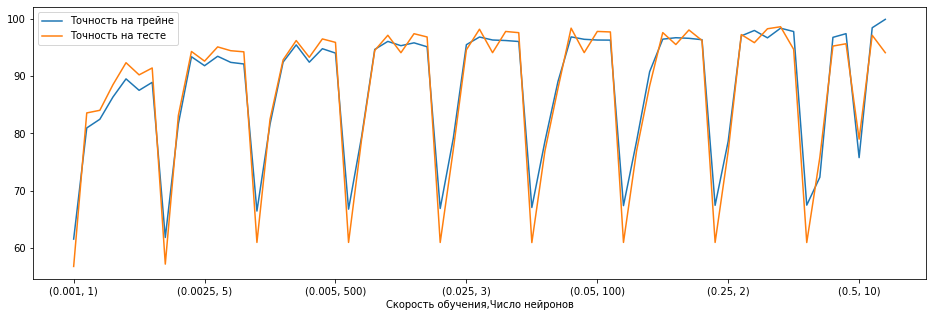

In [93]:
df_by_alpha.plot(figsize=(16, 5))

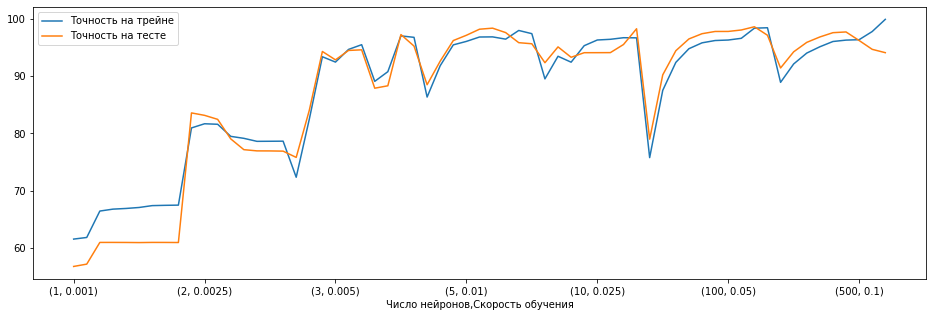

In [101]:
df_by_neur = df_2.groupby(['Число нейронов', 'Скорость обучения']).max()
df_by_neur.plot(figsize=(16, 5))

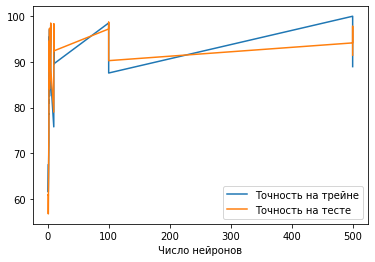

In [99]:
df_2.plot(x='Число нейронов', y=['Точность на трейне', 'Точность на тесте'])

In [108]:
df_3 = pd.DataFrame(columns=['Число нейронов 1', 'Число нейронов 2', 'Скорость обучения', 'Точность на трейне', 'Точность на тесте'])
df_3['Число нейронов 1'] = [el[0] for el in error_list_3_layers]
df_3['Число нейронов 2'] = [el[1] for el in error_list_3_layers]
df_3['Скорость обучения'] = [el[2] for el in error_list_3_layers]
df_3['Точность на трейне'] = [el[6] for el in error_list_3_layers]
df_3['Точность на тесте'] = [el[7] for el in error_list_3_layers]
df_3

,Число нейронов 1,Число нейронов 2,Скорость обучения,Точность на трейне,Точность на тесте
0,1,1,0.5000,56.312468,53.666377
1,1,1,0.2500,56.313183,53.665970
2,1,1,0.1000,56.322805,53.680172
3,1,1,0.0500,56.331875,53.696053
4,1,1,0.0250,56.344425,53.734664
5,1,1,0.0100,56.366574,54.085206
6,1,1,0.0050,56.390345,54.184835
7,1,1,0.0025,56.680879,53.982870
8,1,1,0.0010,56.129803,54.444631
9,1,2,0.5000,73.929470,79.822316


1. Минимальное адекватное число нейронов в скрытом слое сети - 3. При меньшем количестве не удается добиться точности выше 80%. Оптимальное количество нейронов 5 при скорости обучения 0.1.
2. На финальный результат очень сильно влияют изначально присвоенные веса: при изменении random.seed результат заметно меняется при небольшом числе нейронов. При количестве нейронов больше 3 этот показатель влияет на точность значительно меньше.
3. При большом количестве нейронов есть риск переобучения, поскольку очень мало данных. 
4. Наличие второго скрытого слоя не оказывает значительного влияния на точность.




